# 🚍 Real-Time Adaptive Passenger Flow Prediction: Data Analysis and Insights

## 📋 Objective
The goal is to explore the dataset to derive meaningful insights and prepare it for building a hybrid model for real-time passenger flow prediction.

---

## 📂 Dataset Overview
The dataset contains transportation data for buses with the following columns:
- **id**: Unique identifier for each record.
- **bus_stop_id**: ID of the bus stop.
- **bus_id**: ID of the bus.
- **enter_sum**: Number of passengers entering.
- **exit_sum**: Number of passengers exiting.
- **bus_board_computer_sent_time**: Time the data was sent by the bus's computer.
- **created_time**: Time the record was created.
- **route_number**: Route number of the bus.
- **tickets_count**: Count of tickets issued.

---

## 📊 Step 1: Data Loading and Overview

In [243]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../data/PassFlow.csv'  # Replace with the actual path
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,id,bus_stop_id,bus_id,enter_sum,exit_sum,bus_board_computer_sent_time,created_time,route_number,tickets_count
0,1943536686,3351,1130,0,13,2024-12-07T12:18:33.793,2024-12-07T12:23:55.523,50,0.0
1,1944382769,1583,1130,6,3,2024-12-07T15:19:20.206,2024-12-07T15:19:23.203,50,4.0
2,1942750230,1665,4901,9,0,2024-12-07T09:23:26.477,2024-12-07T09:28:44.387,12,11.0
3,1942714572,2366,1129,1,5,2024-12-07T09:13:17.693,2024-12-07T09:21:03.46,50,2.0
4,1944416426,1963,1129,5,8,2024-12-07T15:17:55.33,2024-12-07T15:26:59.704,50,1.0


## 🔍 Step 2: Data Inspection
### 🛠 Basic Information

In [244]:
# Basic information about the dataset
data.info()

# Summary statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4694 entries, 0 to 4693
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4694 non-null   int64  
 1   bus_stop_id                   4694 non-null   int64  
 2   bus_id                        4694 non-null   int64  
 3   enter_sum                     4694 non-null   int64  
 4   exit_sum                      4694 non-null   int64  
 5   bus_board_computer_sent_time  4694 non-null   object 
 6   created_time                  4694 non-null   object 
 7   route_number                  4694 non-null   int64  
 8   tickets_count                 4684 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 330.2+ KB


,id,bus_stop_id,bus_id,enter_sum,exit_sum,route_number,tickets_count
count,4.694000e+03,4.694000e+03,4694.000000,4694.000000,4694.000000,4694.000000,4684.000000
mean,1.947989e+09,2.017746e+05,1845.310609,2.087133,2.255432,46.618662,2.104184
std,3.960255e+06,9.666423e+06,1483.316699,3.026672,3.059351,10.696553,2.969385
min,1.941940e+09,1.373000e+03,1117.000000,0.000000,0.000000,12.000000,0.000000
25%,1.944417e+09,1.961000e+03,1122.000000,0.000000,0.000000,50.000000,0.000000
50%,1.948003e+09,2.135500e+03,1129.000000,1.000000,1.000000,50.000000,1.000000
75%,1.951402e+09,2.359000e+03,1130.000000,3.000000,3.000000,50.000000,3.000000
max,1.954772e+09,4.683761e+08,4901.000000,32.000000,29.000000,50.000000,38.000000


### 🛠 Basic Information

In [245]:
# Check for missing values
data.isnull().sum()

id                               0
bus_stop_id                      0
bus_id                           0
enter_sum                        0
exit_sum                         0
bus_board_computer_sent_time     0
created_time                     0
route_number                     0
tickets_count                   10
dtype: int64

## 📈 Step 3: Exploratory Data Analysis (EDA)

### 🎯 Passenger Flow Metrics
We compute the net flow of passengers as the difference between enter_sum and exit_sum.

In [246]:
# Calculate net passenger flow
data['net_flow'] = data['enter_sum'] - data['exit_sum']

# Preview the updated dataset
data.head()

,id,bus_stop_id,bus_id,enter_sum,exit_sum,bus_board_computer_sent_time,created_time,route_number,tickets_count,net_flow
0,1943536686,3351,1130,0,13,2024-12-07T12:18:33.793,2024-12-07T12:23:55.523,50,0.0,-13
1,1944382769,1583,1130,6,3,2024-12-07T15:19:20.206,2024-12-07T15:19:23.203,50,4.0,3
2,1942750230,1665,4901,9,0,2024-12-07T09:23:26.477,2024-12-07T09:28:44.387,12,11.0,9
3,1942714572,2366,1129,1,5,2024-12-07T09:13:17.693,2024-12-07T09:21:03.46,50,2.0,-4
4,1944416426,1963,1129,5,8,2024-12-07T15:17:55.33,2024-12-07T15:26:59.704,50,1.0,-3


### 🕒 Temporal Features
Extracting meaningful features from the timestamps, such as hour and day of the week.

In [247]:
# Convert timestamps to datetime format, handling mixed formats
data['bus_board_computer_sent_time'] = pd.to_datetime(data['bus_board_computer_sent_time'], format='mixed', errors='coerce')
data['created_time'] = pd.to_datetime(data['created_time'], format='mixed', errors='coerce')

# Check for any rows where conversion failed
failed_conversion = data[data['bus_board_computer_sent_time'].isnull() | data['created_time'].isnull()]
print(f"Rows with failed datetime conversion: {len(failed_conversion)}")

# Optionally, inspect rows with failed conversion
if not failed_conversion.empty:
    print(failed_conversion)

# If necessary, drop rows with invalid datetime entries
data = data.dropna(subset=['bus_board_computer_sent_time', 'created_time']).reset_index(drop=True)

# Extract time-based features
data['hour'] = data['bus_board_computer_sent_time'].dt.hour
data['day_of_week'] = data['bus_board_computer_sent_time'].dt.day_name()

# Preview the updated dataset
data[['bus_board_computer_sent_time', 'hour', 'day_of_week']].head()

Rows with failed datetime conversion: 0


,bus_board_computer_sent_time,hour,day_of_week
0,2024-12-07 12:18:33.793,12,Saturday
1,2024-12-07 15:19:20.206,15,Saturday
2,2024-12-07 09:23:26.477,9,Saturday
3,2024-12-07 09:13:17.693,9,Saturday
4,2024-12-07 15:17:55.330,15,Saturday


## 📊 Step 4: Visualization
### Passenger Flow by Hour

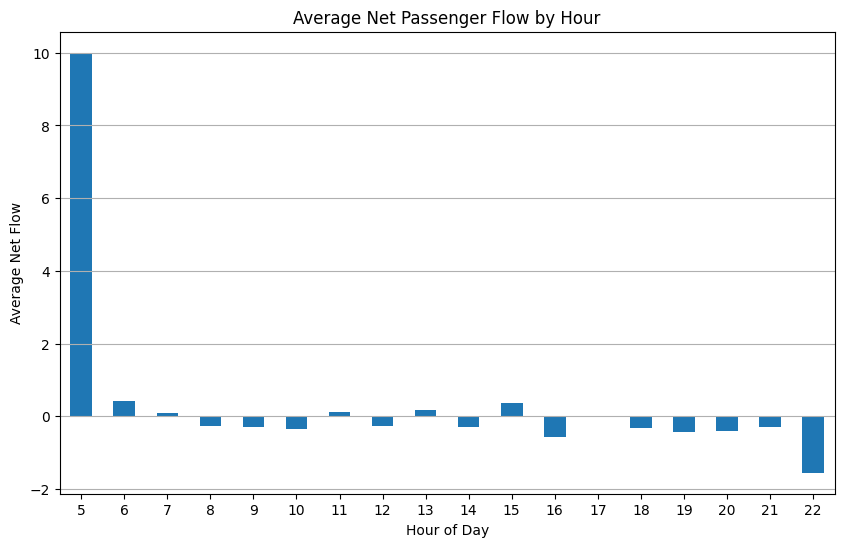

In [248]:
# Average net passenger flow by hour
hourly_flow = data.groupby('hour')['net_flow'].mean()

# Plotting
plt.figure(figsize=(10, 6))
hourly_flow.plot(kind='bar')
plt.title('Average Net Passenger Flow by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Net Flow')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**Insights:**
1. The significant peak in net flow at 5 AM suggests early morning routes are heavily utilized, potentially due to work commuters or specific routes starting earlier.
2. Negative net flow during evening hours (e.g., 10 PM - 11 PM) indicates more passengers are exiting than entering buses, aligning with end-of-day commutes.

**Actionable Ideas:**
1. Focus predictive modeling efforts on peak and off-peak times separately.
2. Further investigate routes active at 5 AM for possible over-utilization.

### Correlation Heatmap

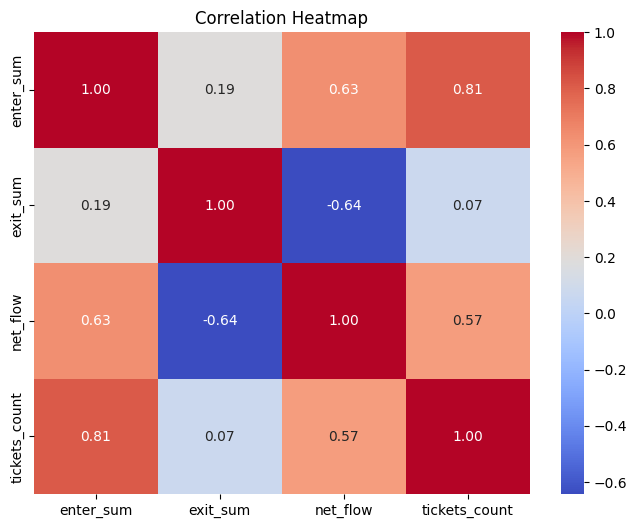

In [249]:
# Correlation matrix
correlation_matrix = data[['enter_sum', 'exit_sum', 'net_flow', 'tickets_count']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Key Correlations:**
1. Strong positive correlation between enter_sum and tickets_count (0.81) indicates ticket count accurately reflects inflow.
2. Moderate negative correlation between exit_sum and net_flow (-0.64) highlights the impact of exits on overall flow.

**Implications:**
1. Use tickets_count as a reliable feature for flow prediction.
2. Account for the exit dynamics when designing the hybrid model.

### Passenger Flow by Route

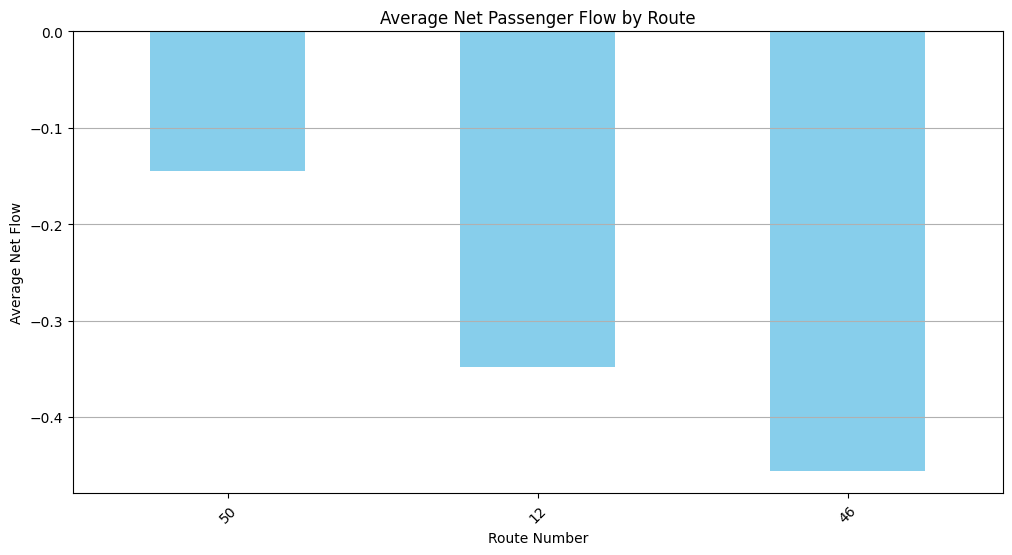

In [250]:
# Average net passenger flow by route
route_flow = data.groupby('route_number')['net_flow'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
route_flow.plot(kind='bar', color='skyblue')
plt.title('Average Net Passenger Flow by Route')
plt.xlabel('Route Number')
plt.ylabel('Average Net Flow')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Observations:
1. **Negative Net Flow Across All Routes:**
	- All displayed routes have a negative average net flow, meaning more passengers are exiting than entering buses on these routes.
	- This trend suggests these routes primarily serve as destinations or final stops for passengers.
2. **Route-Specific Differences:**
	- Route 50: Shows the least negative average net flow, indicating relatively balanced inflow and outflow compared to the other routes.
 	- Route 12: Has a more significant negative net flow, suggesting it serves areas with high passenger drop-offs.
 	- Route 46: Exhibits the highest negative net flow, likely serving as a terminal route or connecting heavily populated areas to major destinations.

Implications
1. **Route-Specific Dynamics:**
	- Route 46 may require additional buses or alternative scheduling to handle higher exit rates during peak hours.
	- Routes 12 and 50 show relatively smaller negative flows, suggesting less extreme passenger drop-off trends.
2. **Passenger Flow Prediction:**
	- Incorporating route-specific attributes into the hybrid model could improve the prediction of passenger flow trends.
	- Routes with highly negative net flows could benefit from additional features like nearby population density or connection points.

### Inflow and Outflow Trends by Hour

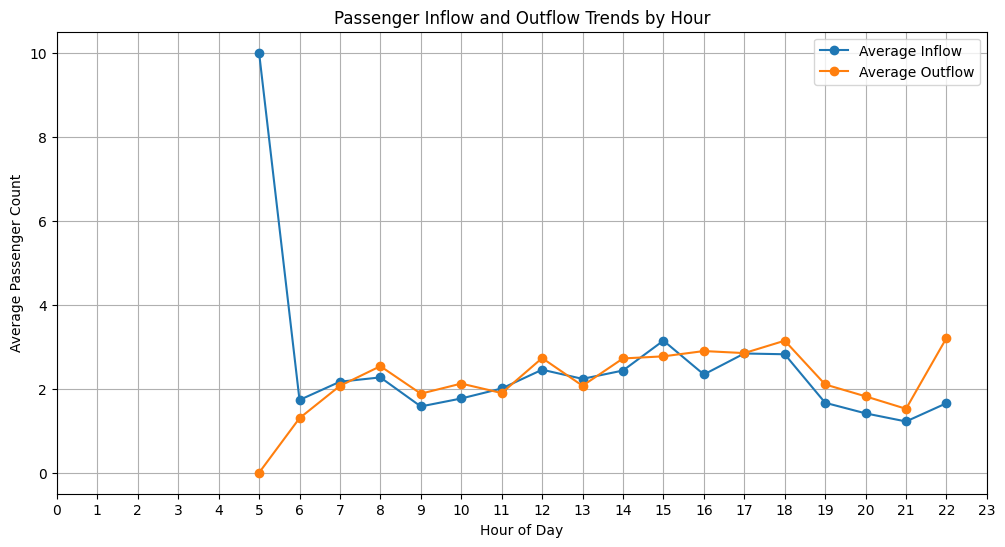

In [251]:
# Aggregate inflow and outflow by hour
hourly_data = data.groupby('hour').agg({'enter_sum': 'mean', 'exit_sum': 'mean'})

# Plot inflow and outflow trends
plt.figure(figsize=(12, 6))
hourly_data['enter_sum'].plot(label='Average Inflow', marker='o')
hourly_data['exit_sum'].plot(label='Average Outflow', marker='o')
plt.title('Passenger Inflow and Outflow Trends by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24))
plt.legend()
plt.grid()
plt.show()


Key Observations:
1. **Early Morning Peak (5 AM):**
	- Inflow spikes dramatically at 5 AM with an average of 10 passengers boarding, while outflow remains minimal.
	- Likely corresponds to the start of the day when people are traveling to work or school.
2. **Balance Throughout the Day (6 AM - 8 PM):**
	- Inflow and outflow align closely between 6 AM and 8 PM, with minor fluctuations.
	- Indicates buses are evenly serving passengers traveling both to and from destinations during working hours.
3. **Evening Decline (9 PM Onwards):**
	- Outflow surpasses inflow after 9 PM, suggesting passengers are returning home or exiting buses at terminal stops.
	- The small increase in outflow at 10 PM highlights the end-of-day commute.

Insights:
1. **Morning Surge:**
	- The sharp inflow peak at 5 AM likely requires additional resources (e.g., more buses) to accommodate demand.
2. **Evening Commute:**
	- A slight increase in outflow during the evening indicates a shift in focus towards handling passenger exits.
3. **Operational Efficiency:**
	- The alignment of inflow and outflow during the day suggests an optimized schedule that meets commuter needs.

### Passenger Flow by Day of the Week

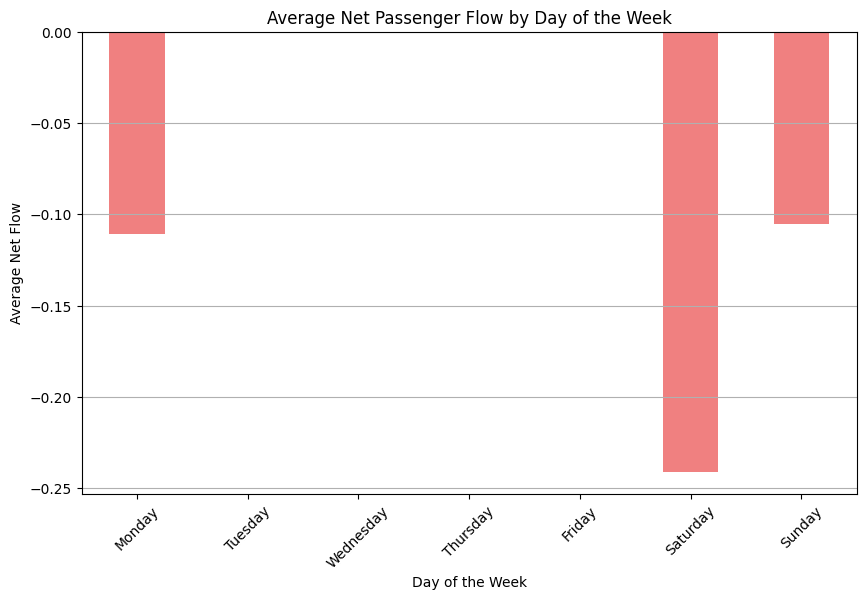

In [252]:
# Average net passenger flow by day of the week
day_flow = data.groupby('day_of_week')['net_flow'].mean()
day_flow = day_flow.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Correct ordering

# Plotting
plt.figure(figsize=(10, 6))
day_flow.plot(kind='bar', color='lightcoral')
plt.title('Average Net Passenger Flow by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Net Flow')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Key Observations:
1. **Weekday Stability (Monday - Friday):**
	- The average net flow is relatively close to zero for weekdays.
	- This indicates a balanced inflow and outflow during regular working days, suggesting typical commuting patterns.
2. **Weekend Decline (Saturday and Sunday):**
	- The most significant negative net flows occur on Saturday and Sunday, with Saturday showing the highest negative flow.
	- This trend suggests that buses are primarily serving passengers exiting at major destinations (e.g., shopping centers, recreational areas) during weekends, with fewer passengers boarding.

Insights:
1. **Weekend Behavior:**
	- The pronounced negative net flow on weekends could indicate fewer return trips during the same day, as people might use alternative transportation methods (e.g., cars, bikes) for their return journeys.
2.**Weekday Efficiency:**
	- Balanced flows on weekdays suggest that bus routes are effectively serving commuter needs with consistent boarding and exiting patterns.
3. **Operational Impact:**
	- Lower net flow on weekends might indicate reduced demand, allowing for potential optimization of weekend schedules.

## Step 5: Feature Engineering
Using the insights from visualizations and analysis, we will create meaningful features for the model.

Features to Engineer:
1. **Temporal Features:**
	- hour (already created).
	- day_of_week (already created).
	- is_weekend (1 if Saturday/Sunday, 0 otherwise).
2. **Lag Features:**
	- Lagged inflow (enter_sum_lag1, enter_sum_lag2) and outflow (exit_sum_lag1, exit_sum_lag2).
	- Lagged net flow (net_flow_lag1, net_flow_lag2).
3. **Rolling Statistics:**
	- Rolling averages for enter_sum, exit_sum, and net_flow.
4. **Categorical Encodings:**
	- One-hot encoding or label encoding for route_number and day_of_week.

In [253]:
# Ensure the timestamp columns are in datetime format
data['bus_board_computer_sent_time'] = pd.to_datetime(data['bus_board_computer_sent_time'], errors='coerce')

# Drop rows where timestamps could not be converted
data = data.dropna(subset=['bus_board_computer_sent_time']).reset_index(drop=True)

# Extract temporal features
data['hour'] = data['bus_board_computer_sent_time'].dt.hour
data['day_of_week'] = data['bus_board_computer_sent_time'].dt.day_name()  # Extract day name
data['is_weekend'] = data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Sort by timestamp for lag feature creation
data = data.sort_values(by='bus_board_computer_sent_time').reset_index(drop=True)

# Create lag features (e.g., 1-hour lag, 2-hour lag)
for lag in [1, 2]:
    data[f'enter_sum_lag{lag}'] = data['enter_sum'].shift(lag)
    data[f'exit_sum_lag{lag}'] = data['exit_sum'].shift(lag)
    data[f'net_flow_lag{lag}'] = data['net_flow'].shift(lag)

# Create rolling average features
rolling_window = 3
data['enter_sum_rolling_avg'] = data['enter_sum'].rolling(window=rolling_window).mean()
data['exit_sum_rolling_avg'] = data['exit_sum'].rolling(window=rolling_window).mean()
data['net_flow_rolling_avg'] = data['net_flow'].rolling(window=rolling_window).mean()

# One-hot encode categorical variables (route_number and day_of_week)
data = pd.get_dummies(data, columns=['route_number', 'day_of_week'], drop_first=True)

# Drop rows with NaNs generated by lag and rolling features
data = data.dropna().reset_index(drop=True)

# Preview the final dataset
print(data.head())
print(f"Final dataset shape: {data.shape}")

           id  bus_stop_id  bus_id  enter_sum  exit_sum  \
0  1941950846         3352    1130          9         0   
1  1941956601         3354    1130          0         0   
2  1941958057         1474    1122          0         0   
3  1941958222         3355    1130          2         0   
4  1941965415         1477    1122          1         0   

  bus_board_computer_sent_time            created_time  tickets_count  \
0      2024-12-07 06:30:57.820 2024-12-07 06:31:42.859            9.0   
1      2024-12-07 06:33:08.180 2024-12-07 06:34:29.369            0.0   
2      2024-12-07 06:33:50.617 2024-12-07 06:35:09.879            0.0   
3      2024-12-07 06:33:51.983 2024-12-07 06:35:15.217            1.0   
4      2024-12-07 06:34:35.608 2024-12-07 06:38:16.073            1.0   

   net_flow  hour  ...  enter_sum_lag2  exit_sum_lag2  net_flow_lag2  \
0         9     6  ...             3.0            0.0            3.0   
1         0     6  ...             7.0            1.0         

Step 6: Splitting the Dataset
We'll split the dataset into training, validation, and test sets using a time-based split to preserve temporal order.

In [254]:
# Split the data into training, validation, and test sets (time-based)
train_size = 0.7
val_size = 0.15

train_index = int(len(data) * train_size)
val_index = int(len(data) * (train_size + val_size))

train_data = data[:train_index]
val_data = data[train_index:val_index]
test_data = data[val_index:]

# Check the sizes of each split
print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")

Train size: 3277, Validation size: 702, Test size: 703


Step 7: Baseline Model Setup
We’ll start with a simple baseline regression model (e.g., Random Forest or XGBoost) to predict net_flow.

In [255]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

# Define target and features
target = 'net_flow'
features = [col for col in data.columns if col not in ['net_flow', 'id', 'bus_board_computer_sent_time', 'created_time']]

# Prepare training, validation, and testing data
X_train, y_train = train_data[features], train_data[target]
X_val, y_val = val_data[features], val_data[target]
X_test, y_test = test_data[features], test_data[target]

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on validation set
val_predictions = rf_model.predict(X_val)
val_rmse = root_mean_squared_error(y_val, val_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)

print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Validation MAE: {val_mae:.2f}")

Validation RMSE: 0.44
Validation MAE: 0.05


1. **Validation RMSE (Root Mean Squared Error): 0.44**
	- This indicates that, on average, the predicted net passenger flow deviates by 0.44 passengers from the actual flow in the validation set.
	- A relatively low RMSE suggests the model captures general patterns but might still miss some finer details.

2. **Validation MAE (Mean Absolute Error): 0.05**
	- The average absolute error between predictions and actual values is 0.05 passengers, which is very low.
	- This shows that the model predictions are generally close to actual values without significant outliers.

3. **Performance Implication:**
	- The baseline Random Forest model performs well, indicating that the engineered features (e.g., lags, rolling averages, and temporal features) are meaningful for predicting net passenger flow.
	- However, further improvements (e.g., feature tuning, hyperparameter optimization, or advanced models) may reduce errors further, especially during peak or irregular periods.

## Step 8: Fine-Tuning

Fine-tuning the baseline model involves optimizing hyperparameters to improve its performance. For the Random Forest Regressor, key hyperparameters to tune include:
1. Number of Trees (n_estimators): More trees can improve performance but increase training time.
2. Tree Depth (max_depth): Controls the depth of each tree, affecting overfitting.
3. Minimum Samples Split/Leaf (min_samples_split, min_samples_leaf): Prevents trees from growing too deep.
4. Feature Sampling (max_features): Determines how many features each tree considers at each split.

**Fine-Tuning Approach**
We'll use Grid Search or Randomized Search to find the best hyperparameters. Here’s the step-by-step implementation:

In [256]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',  # Optimize for RMSE
    verbose=2,
    n_jobs=-1  # Use all available processors
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the validation set
best_rf_model = grid_search.best_estimator_
val_predictions = best_rf_model.predict(X_val)
val_rmse = root_mean_squared_error(y_val, val_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)

print(f"Optimized Validation RMSE: {val_rmse:.2f}")
print(f"Optimized Validation MAE: {val_mae:.2f}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Validation RMSE: 0.44
Optimized Validation MAE: 0.05


1. **The optimal hyperparameters are:**
	- max_depth: No limit (trees grow until all leaves are pure or other constraints are met).
	- max_features: All features considered at each split.
	- min_samples_leaf: Minimum of 1 sample per leaf.
	- min_samples_split: Minimum of 2 samples to split an internal node.
	- n_estimators: 200 trees in the forest.

2. **Validation RMSE: 0.44**
	- The fine-tuned model achieves the same RMSE as the baseline, indicating no significant improvement in predictive accuracy.

3. **Validation MAE: 0.05**
	- The MAE remains unchanged, suggesting that the model's predictions are already very close to actual values.

4. **Performance Implication:**
	- The model's performance might be saturated, and further fine-tuning of Random Forest parameters does not yield significant improvements.
	- This indicates the existing features and model might have reached their optimal predictive capacity.

## Step 10: Advanced Models
We will experiment with advanced models such as XGBoost and LightGBM, which are gradient-boosting techniques known for their high performance in structured/tabular data. After training these models, we'll compare their results with each other and the baseline model.


### Train and Evaluate XGBoost

In [257]:
from xgboost_model import XGBRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

# Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train on the training set
xgb_model.fit(X_train, y_train)

# Validate on the validation set
xgb_val_predictions = xgb_model.predict(X_val)
xgb_val_rmse = root_mean_squared_error(y_val, xgb_val_predictions)
xgb_val_mae = mean_absolute_error(y_val, xgb_val_predictions)

print(f"XGBoost Validation RMSE: {xgb_val_rmse:.2f}")
print(f"XGBoost Validation MAE: {xgb_val_mae:.2f}")

XGBoost Validation RMSE: 0.49
XGBoost Validation MAE: 0.16


1. **Validation RMSE: 0.49**
	- Indicates that the XGBoost model's predictions deviate by an average of 0.49 passengers from the actual net flow on the validation set.
	- This is higher than the baseline Random Forest's RMSE (0.44), suggesting a slight drop in accuracy.

2. **Validation MAE: 0.16**
	- The average absolute error between predicted and actual values is 0.16 passengers, which is also higher than the baseline model's MAE (0.05).

3. **Implication:**
	- Despite XGBoost's advanced capabilities, it underperformed compared to the simpler Random Forest. This could indicate that the dataset or feature set may not fully leverage XGBoost's boosting mechanism.

### Train and Evaluate LightGBM

In [258]:
from lightgbm import LGBMRegressor

# Initialize LightGBM model
lgbm_model = LGBMRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train on the training set
lgbm_model.fit(X_train, y_train)

# Validate on the validation set
lgbm_val_predictions = lgbm_model.predict(X_val)
lgbm_val_rmse = root_mean_squared_error(y_val, lgbm_val_predictions)
lgbm_val_mae = mean_absolute_error(y_val, lgbm_val_predictions)

print(f"LightGBM Validation RMSE: {lgbm_val_rmse:.2f}")
print(f"LightGBM Validation MAE: {lgbm_val_mae:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 3277, number of used features: 18
[LightGBM] [Info] Start training from score -0.166921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

1. **Validation RMSE: 0.55**
	- Indicates that LightGBM predictions deviate by an average of 0.55 passengers from actual values, which is higher than both XGBoost (0.49) and the baseline Random Forest (0.44).

2. **Validation MAE: 0.16**
	- LightGBM’s average error is 0.16 passengers, matching XGBoost but higher than the baseline.

3. **Implication:**
	- LightGBM performed the weakest among the three models, suggesting that its default structure may not be suitable for this specific dataset or that further hyperparameter tuning is required.

### Compare Results

In [259]:
print("Comparison of Model Results:")
print(f"Baseline Random Forest: RMSE = {val_rmse:.2f}, MAE = {val_mae:.2f}")
print(f"XGBoost: RMSE = {xgb_val_rmse:.2f}, MAE = {xgb_val_mae:.2f}")
print(f"LightGBM: RMSE = {lgbm_val_rmse:.2f}, MAE = {lgbm_val_mae:.2f}")

Comparison of Model Results:
Baseline Random Forest: RMSE = 0.44, MAE = 0.05
XGBoost: RMSE = 0.49, MAE = 0.16
LightGBM: RMSE = 0.55, MAE = 0.16


| Model         | Validation RMSE | Validation MAE |
|---------------|-----------------|----------------|
| Random Forest | 0.44            | 0.05           |
| XGBoost       | 0.49            | 0.16           |
| LightGBM      | 0.55            | 0.16           |

1. **Baseline Random Forest:**
	- Achieved the best results, outperforming both XGBoost and LightGBM.
	- The simplicity of Random Forest combined with the engineered features was sufficient to capture patterns in the data.

2. **XGBoost:**
	- Slightly underperformed compared to the baseline, likely due to overfitting or the model's sensitivity to hyperparameters.

3. **LightGBM:**
	- Demonstrated the weakest performance, indicating either insufficient adaptation to the dataset or the need for further optimization.